## Chapter4. 선형회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 실습 5 : 시뮬레이션 데이터 실습

실습내용: 1차 선형 함수를 신경망으로 표현하고, 시뮬레이션 데이터를 생성해 선형회귀 분석 수행<BR>
w=3, b=4

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


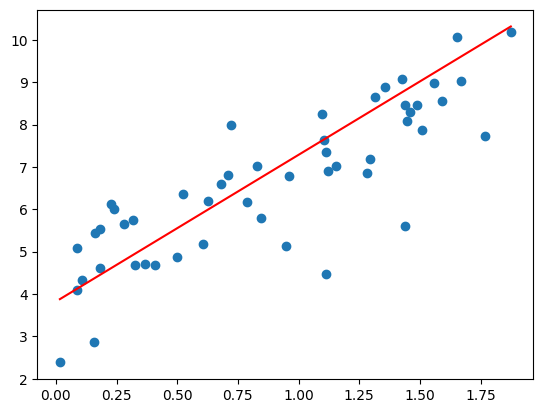

In [ ]:
# 시뮬레이션 데이터 생성: a=3, b=4인 가상 데이터

x = 2*np.random.rand(50,1)
y = 4 + 3*x + np.random.randn(50,1)

plt.scatter(x,y)

# 회귀직선 그리기
fit_line=np.polyfit(x[0,:],y[0,:],1)
x_minmax = np.array([min(x), max(x)])
fit_y = x_minmax * fit_line[0] + fit_line[1]
plt.plot(x_minmax, fit_y,color='red')
plt.show()

In [ ]:
# 가중치 초기화 - 임의의 범위(-5~5) 사이의 균일 분포 랜덤값
wi = np.random.uniform(low=-5.0, high=5.0)
bi = np.random.uniform(low=-5.0, high=5.0)

In [ ]:
# 가중치 업데이트
num_iter = 1000
learning_rate = 0.02

In [ ]:
# 설정한 반복횟수(1000) 만큼 반복 수행(오차가 0.01보다 작아지면 반복 수행 중단)
errors , w_rate, b_rate = [], [],[]
for iter in range(num_iter):
  y_hat = wi*x + bi
  wi = wi - learning_rate*((y_hat- y)*x).mean()
  bi = bi - learning_rate*(y_hat-y).mean()
  error = np.square(y_hat-y).mean()
  errors.append(error)
  w_rate.append(wi)
  b_rate.append(bi)
  if error < 0.01:
    break

In [ ]:
# 경사하강법으로 1000번 iteration 후 최종 가중치 매개변수
wi,bi

(3.2260128651824442, 3.733254302321765)

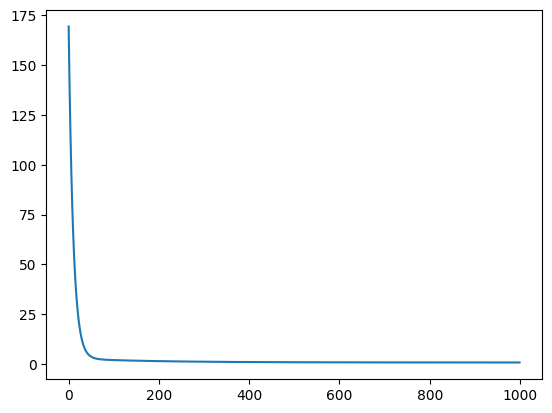

In [ ]:
plt.plot(np.arange(0,1000), errors)
plt.show()

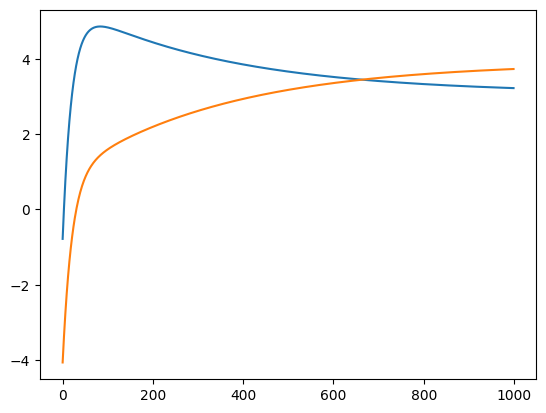

In [ ]:
# 이터레이션에 따른 가중치 (w,b) 값의 변화
plt.plot(np.arange(0,1000),w_rate)
plt.plot(np.arange(0,1000),b_rate)


#### **[결과 분석]**
1. X=1.5 일때 예측값은? 9.017578180012851 <br>
    -> 회귀직선에 따라 x값이 1.5일때의 y값은 9.017578180012851이다. <br>

2. 경사하강법으로 이터레이션 1000번 동안 임의의 범위(-5~5) 사이의 균일 분포 랜덤값인 wi, bi의 값의 변화를 관찰한 결과 (w,b) =(3,4)에 근사한 최적값을 도출할 수 있었음.<br>
  최종 가중치 매개변수 w, b ->(3.2260128651824442, 3.733254302321765)